In [1]:

import re # regex

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # charting
from sklearn.feature_extraction.text import CountVectorizer # convert text to token counts
from wordcloud import WordCloud 
%matplotlibinline

In [2]:
df= pd.read_csv('basketball.csv')
df.head()

,Player Name,own_team,own_team_rating,opponent_team,opponent_team_rating,hight,position,PPG,Point,Class
0,Klay Thompson,Golden State Warriors,9.3,Boston Celtics,4.1,201,2,20.6,13,2
1,Klay Thompson,Golden State Warriors,9.3,Portland Trail Blazers,0.2,201,2,20.6,24,3
2,Klay Thompson,Golden State Warriors,9.3,Miami Heat,-0.1,201,2,20.6,19,2
3,Klay Thompson,Golden State Warriors,9.3,Los Angeles Lakers,-3.3,201,2,20.6,20,2
4,Kyrie Irving,Boston Celtics,4.1,Golden State Warriors,9.3,190,1,24.0,16,2


In [3]:
df.dtypes

Player Name              object
own_team                 object
own_team_rating         float64
opponent_team            object
opponent_team_rating    float64
hight                     int64
position                  int64
PPG                     float64
Point                     int64
Class                     int64
dtype: object

In [7]:
p=list(df.columns)

In [8]:
p

['Player Name',
 'own_team',
 'own_team_rating',
 'opponent_team',
 'opponent_team_rating',
 'hight',
 'position',
 'PPG',
 'Point',
 'Class']

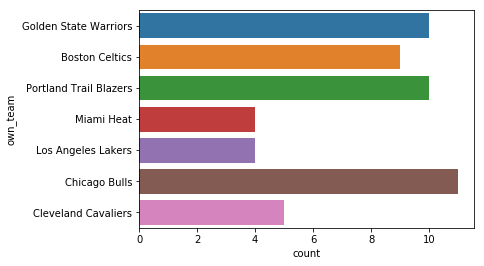

In [13]:
import seaborn as sn
sn.countplot(data=df,y='own_team')

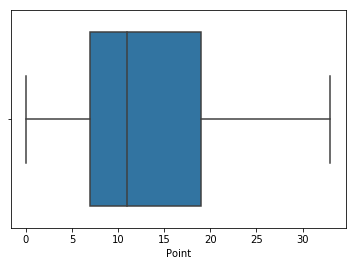

In [18]:
sn.boxplot(df['Point'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


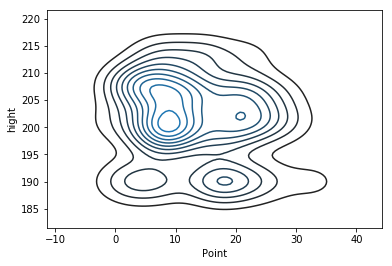

In [21]:
sn.kdeplot(df['Point'],df['hight'])

In [56]:
#dir(plt)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


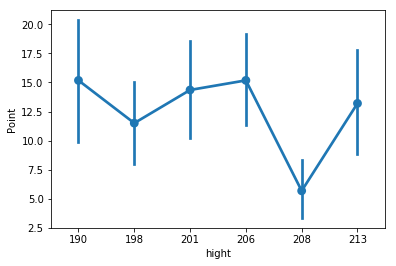

In [29]:
sn.pointplot(df['hight'],df['Point'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


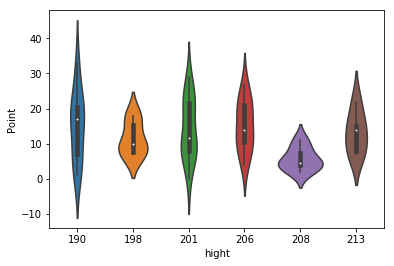

In [28]:

sn.violinplot(df['hight'],df['Point'])

In [34]:
p=df['Point'].sort_values

In [35]:
#dir(df['Point'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


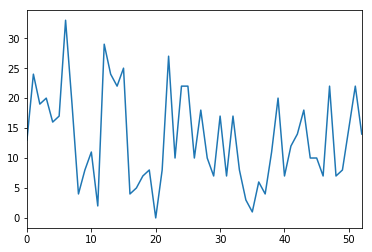

In [42]:
sn.tsplot(df['Point'])

In [54]:
#sn.heatmap(df['Player Name'])

In [55]:
#plt.colorbar()

In [51]:
%matplotlibinline

UsageError: Line magic function `%matplotlibinline` not found.


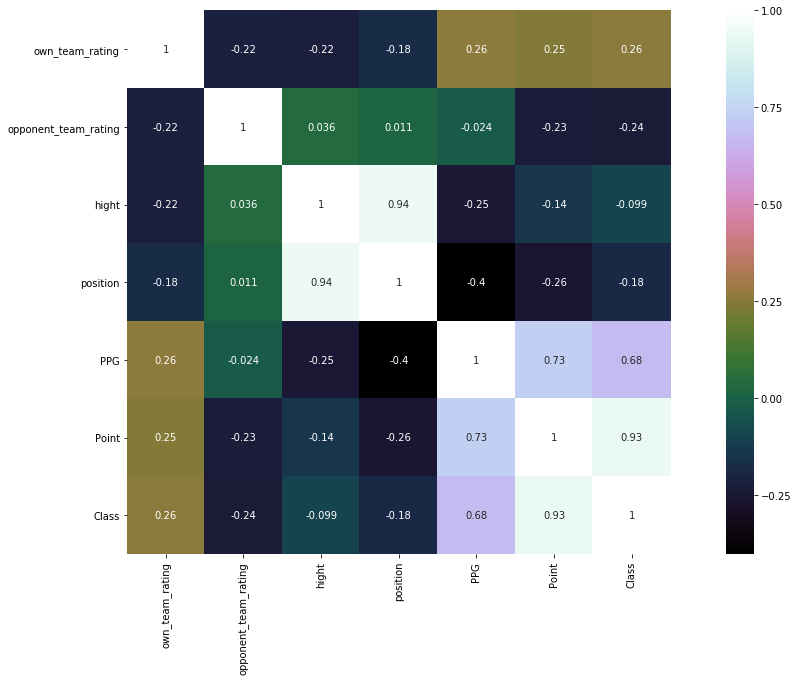

In [53]:
corr_mat = df.corr(method='pearson')
plt.figure(figsize=(20,10))
sn.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

Text(0.5,0,'Name')

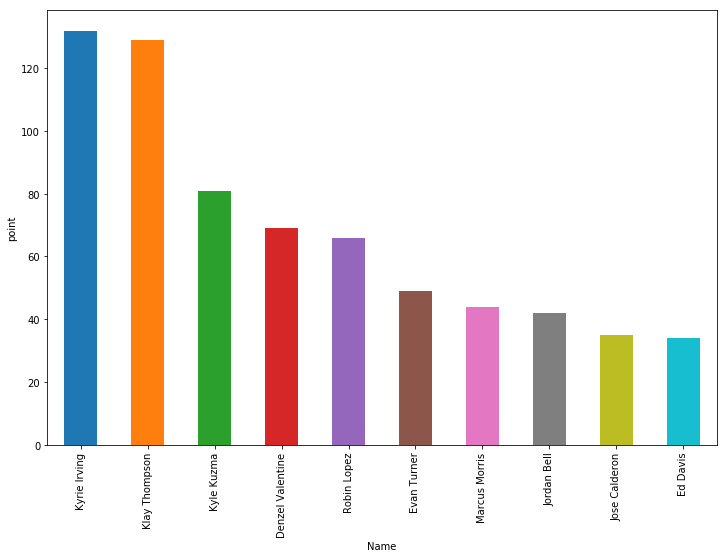

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df.groupby("Player Name")["Point"].sum().nlargest(10).plot(kind='bar', ax=ax)
ax.set_ylabel("point")
ax.set_xlabel("Name")

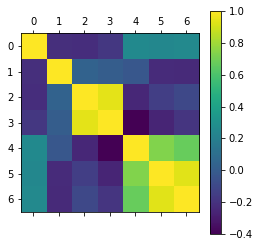

In [61]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [64]:
df['Player Name'].count

<bound method Series.count of 0        Klay Thompson
1        Klay Thompson
2        Klay Thompson
3        Klay Thompson
4         Kyrie Irving
5         Kyrie Irving
6         Kyrie Irving
7         Kyrie Irving
8             Ed Davis
9             Ed Davis
10            Ed Davis
11            Ed Davis
12       Klay Thompson
13       Klay Thompson
14        Kyrie Irving
15        Kyrie Irving
16            Ed Davis
17            Ed Davis
18     Justise Winslow
19     Justise Winslow
20     Justise Winslow
21     Justise Winslow
22          Kyle Kuzma
23          Kyle Kuzma
24          Kyle Kuzma
25          Kyle Kuzma
26    Denzel Valentine
27    Denzel Valentine
28    Denzel Valentine
29    Denzel Valentine
30    Denzel Valentine
31    Denzel Valentine
32       Jose Calderon
33       Jose Calderon
34       Jose Calderon
35       Jose Calderon
36       Jose Calderon
37         Jordan Bell
38         Jordan Bell
39         Jordan Bell
40         Jordan Bell
41       Marcus Morris
42  

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  
 |      .. versionchanged :: 0.23.0
 |

In [70]:
df['Point'].agg(['min', 'max'])

min     0
max    33
Name: Point, dtype: int64